/mnt/c/Users/ldhag/Downloads/COVID-19_Daily_Surveillance_Data_Public.csv

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
from datetime import date, timedelta
%matplotlib inline

In [2]:
df_sa = pd.read_csv('COVID-19_Daily_Surveillance_Data_Public.csv')

In [3]:
df_sa.tail()

,X,Y,objectid,globalid,reporting_date,total_case_daily_change,total_case_cumulative,deaths_daily_change,deaths_cumulative,strac_covid_positive_in_hospita,strac_covid_positive_in_icu,strac_covid_positive_on_ventila,strac_total_ventilators,strac_available_ventilators,strac_total_staffed_beds,strac_available_staffed_beds,count_7_day_moving_avg,change_in_7_day_moving_avg,deaths_under_investigation
571,0.0,0.0,581,6b964f65-5dd5-463f-838a-3e8b4768f2d2,2021/09/06 17:00:00+00,950.0,291041.0,0.0,3941,1216.0,358.0,233.0,805.0,361.0,4269.0,489.0,1162.0,136.0,NaN
572,0.0,0.0,582,045d4a0c-f1e6-4cc7-81f2-1ba8f54ada4a,2021/09/07 17:00:00+00,1288.0,293988.0,0.0,3994,1215.0,359.0,243.0,805.0,367.0,4272.0,477.0,1222.0,60.0,NaN
573,0.0,0.0,583,a6113ec7-5b51-4d16-8a75-658e7e31a857,2021/09/08 17:00:00+00,1012.0,295000.0,2.0,3996,1194.0,360.0,242.0,806.0,365.0,4304.0,405.0,1087.0,-135.0,NaN
574,0.0,0.0,584,24dad61b-9101-47d3-8ce4-61129ba26a6c,2021/09/09 17:00:00+00,953.0,295953.0,21.0,4017,1159.0,365.0,260.0,807.0,364.0,4323.0,399.0,983.0,-104.0,NaN
575,0.0,0.0,585,092c761a-c9c0-4068-85a0-9c8a3f66f2e6,2021/09/10 17:00:00+00,620.0,296573.0,18.0,4035,1121.0,358.0,249.0,804.0,352.0,4252.0,379.0,934.0,-49.0,NaN


In [4]:
type(df_sa.loc[:,'reporting_date'][400])

str

In [5]:
df_sa.reporting_date = pd.to_datetime(df_sa.reporting_date)

In [6]:
type(df_sa.loc[:,'reporting_date'][400])

pandas._libs.tslibs.timestamps.Timestamp

In [7]:
df_sa_dtindex = df_sa.set_index('reporting_date')

In [8]:
df_sa.reporting_date[0]

Timestamp('2020-02-12 06:00:00+0000', tz='UTC')

In [9]:
df_newcases = df_sa_dtindex.loc[:,['total_case_daily_change']]

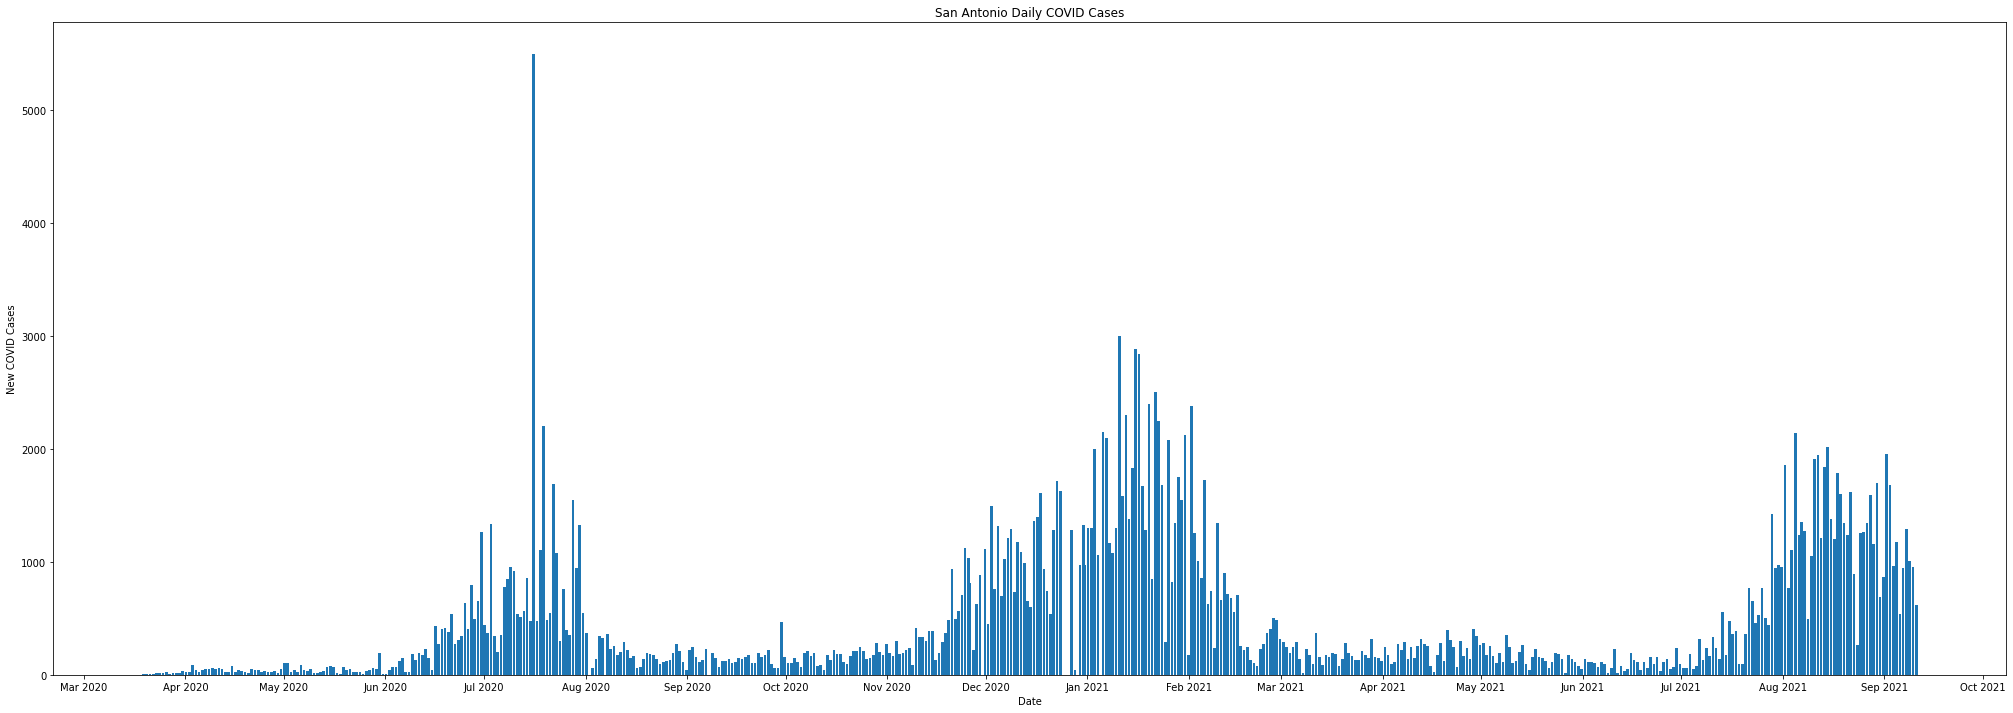

In [10]:
import datetime
import matplotlib.dates as mdates
months = mdates.MonthLocator()
days = mdates.DayLocator()
timeFmt = mdates.DateFormatter('%b %Y')
fig, ax = plt.subplots()
fig.set_size_inches(35,12)
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(timeFmt)
#ax.xaxis.set_minor_locator(months)
plt.title('San Antonio Daily COVID Cases')
plt.xlabel('Date',color='black')
plt.ylabel('New COVID Cases',color='black')
plt.bar(df_newcases.index,df_newcases.total_case_daily_change)
fig.savefig('MetroDailySANew.png')

In [11]:
df_sa_covid_icu = df_sa_dtindex.loc[:,['strac_covid_positive_in_icu']]

In [12]:
df_sa_covid_icu

,strac_covid_positive_in_icu
reporting_date,
2020-02-12 06:00:00+00:00,NaN
2020-02-13 06:00:00+00:00,NaN
2020-02-14 06:00:00+00:00,NaN
2020-02-15 06:00:00+00:00,NaN
2020-02-16 06:00:00+00:00,NaN
...,...
2021-09-06 17:00:00+00:00,358.0
2021-09-07 17:00:00+00:00,359.0
2021-09-08 17:00:00+00:00,360.0


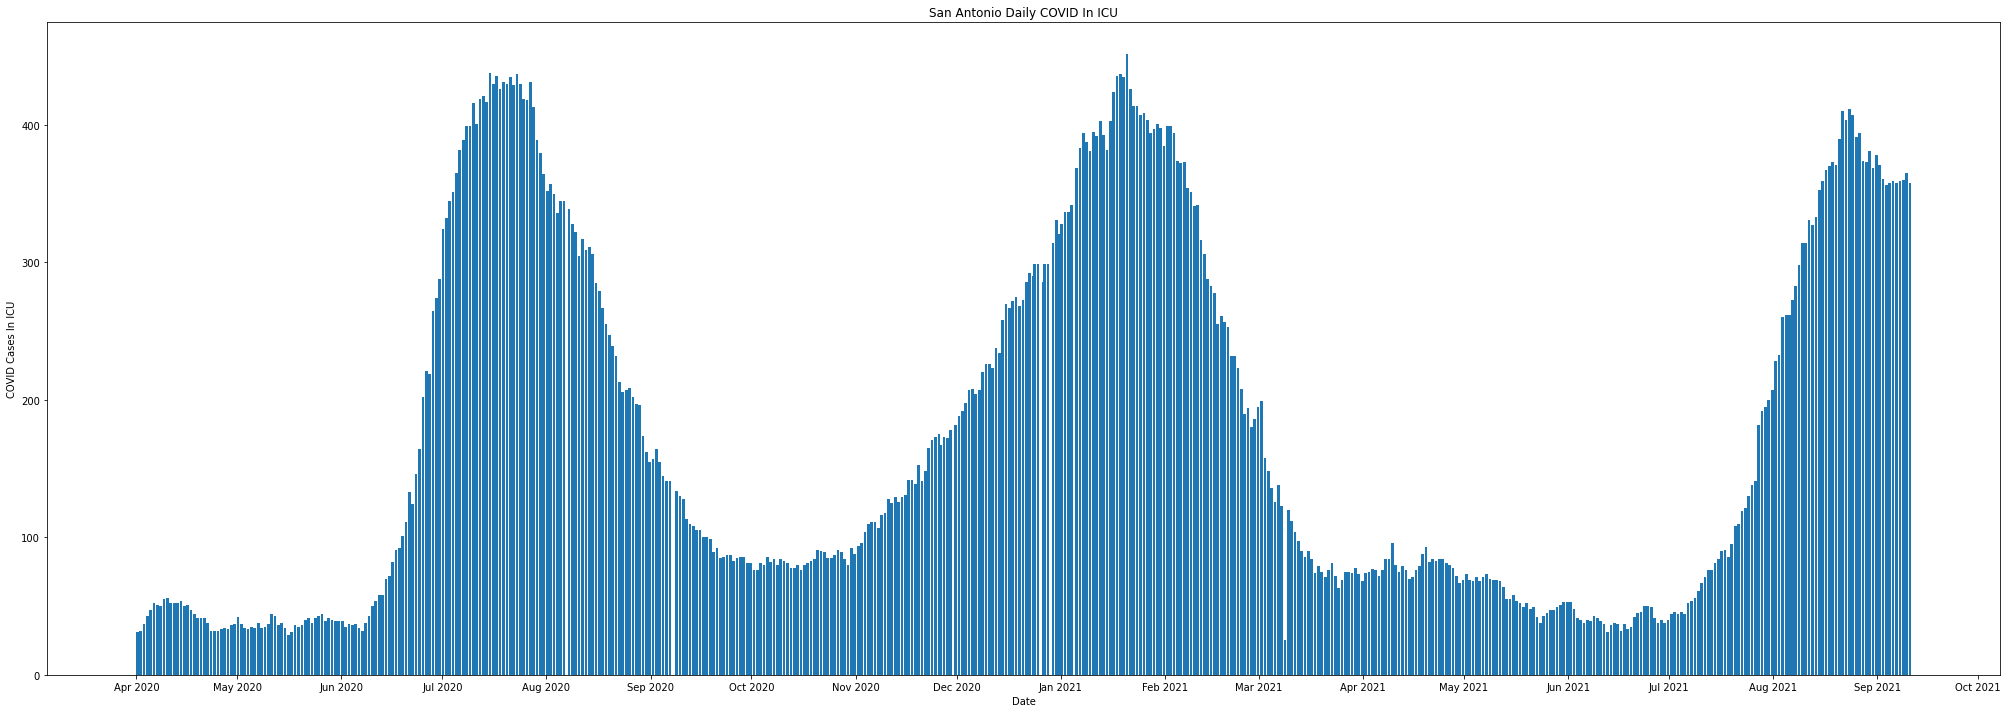

In [13]:
import datetime
import matplotlib.dates as mdates
months = mdates.MonthLocator()
days = mdates.DayLocator()
timeFmt = mdates.DateFormatter('%b %Y')
fig, ax = plt.subplots()
fig.set_size_inches(35,12)
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(timeFmt)
#ax.xaxis.set_minor_locator(months)
plt.title('San Antonio Daily COVID In ICU')
plt.xlabel('Date',color='black')
plt.ylabel('COVID Cases In ICU',color='black')
plt.bar(df_sa_covid_icu.index,df_sa_covid_icu.strac_covid_positive_in_icu)
fig.savefig('MetroICUSANew.png')

In [14]:
df_sa_deaths = df_sa_dtindex.loc[:,['deaths_daily_change']]

In [15]:
df_sa_deaths

,deaths_daily_change
reporting_date,
2020-02-12 06:00:00+00:00,NaN
2020-02-13 06:00:00+00:00,NaN
2020-02-14 06:00:00+00:00,NaN
2020-02-15 06:00:00+00:00,NaN
2020-02-16 06:00:00+00:00,NaN
...,...
2021-09-06 17:00:00+00:00,0.0
2021-09-07 17:00:00+00:00,0.0
2021-09-08 17:00:00+00:00,2.0


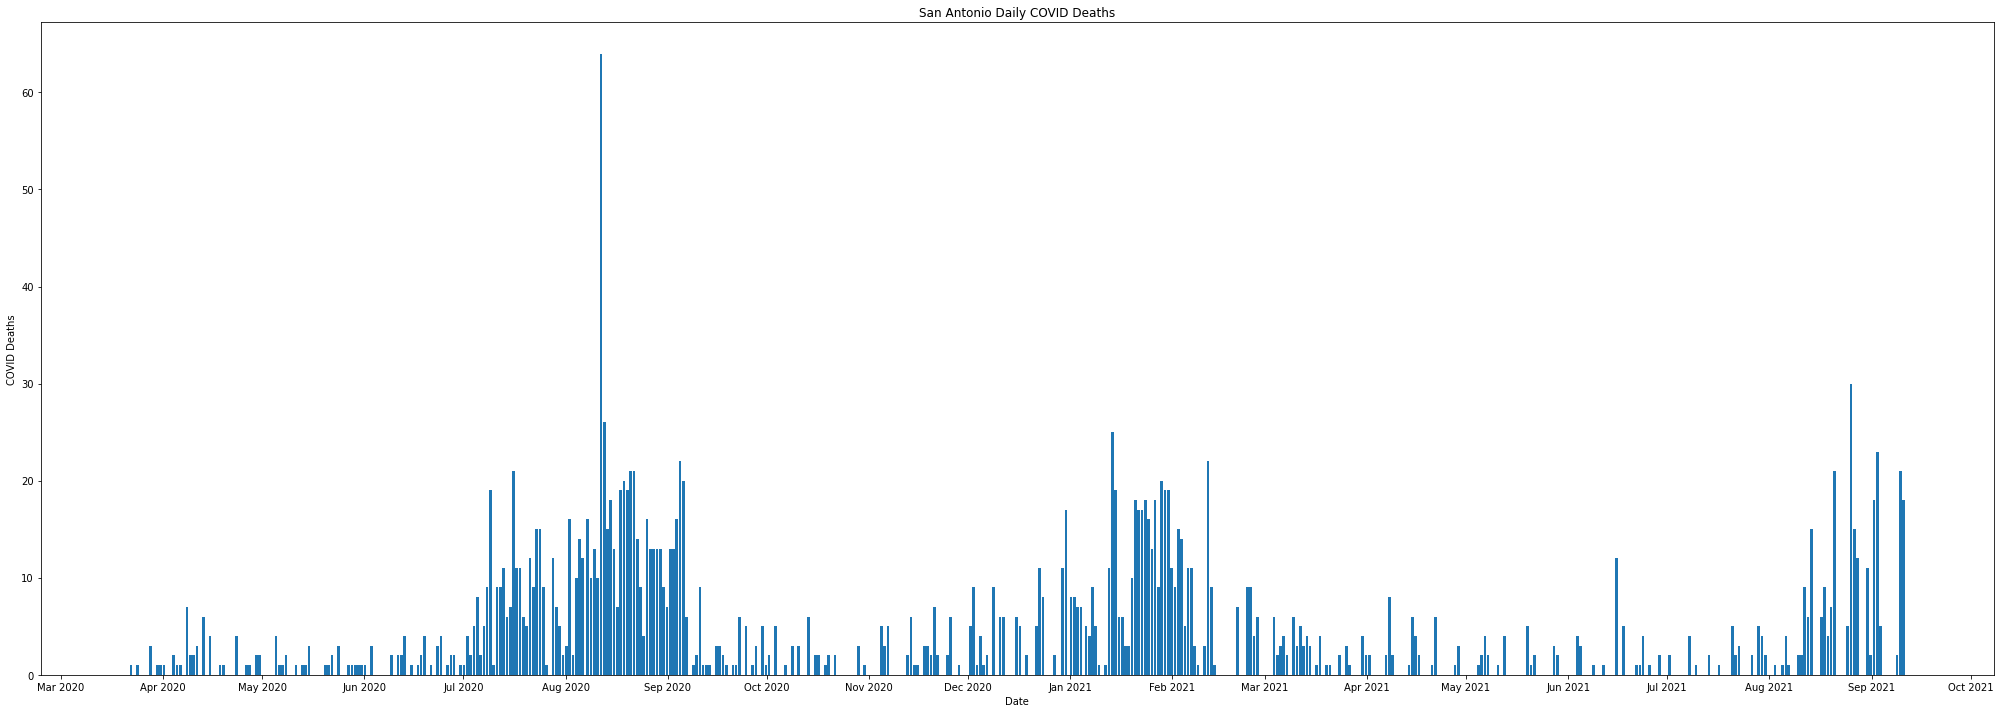

In [16]:
import datetime
import matplotlib.dates as mdates
months = mdates.MonthLocator()
days = mdates.DayLocator()
timeFmt = mdates.DateFormatter('%b %Y')
fig, ax = plt.subplots()
fig.set_size_inches(35,12)
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(timeFmt)
#ax.xaxis.set_minor_locator(months)
plt.title('San Antonio Daily COVID Deaths')
plt.xlabel('Date',color='black')
plt.ylabel('COVID Deaths',color='black')
plt.bar(df_sa_deaths.index,df_sa_deaths.deaths_daily_change)
fig.savefig('MetroDeathsSANew.png')

In [17]:
df_sa_hospital = df_sa_dtindex.loc[:,['strac_covid_positive_in_hospita']]

In [18]:
df_sa_hospital

,strac_covid_positive_in_hospita
reporting_date,
2020-02-12 06:00:00+00:00,NaN
2020-02-13 06:00:00+00:00,NaN
2020-02-14 06:00:00+00:00,NaN
2020-02-15 06:00:00+00:00,NaN
2020-02-16 06:00:00+00:00,NaN
...,...
2021-09-06 17:00:00+00:00,1216.0
2021-09-07 17:00:00+00:00,1215.0
2021-09-08 17:00:00+00:00,1194.0


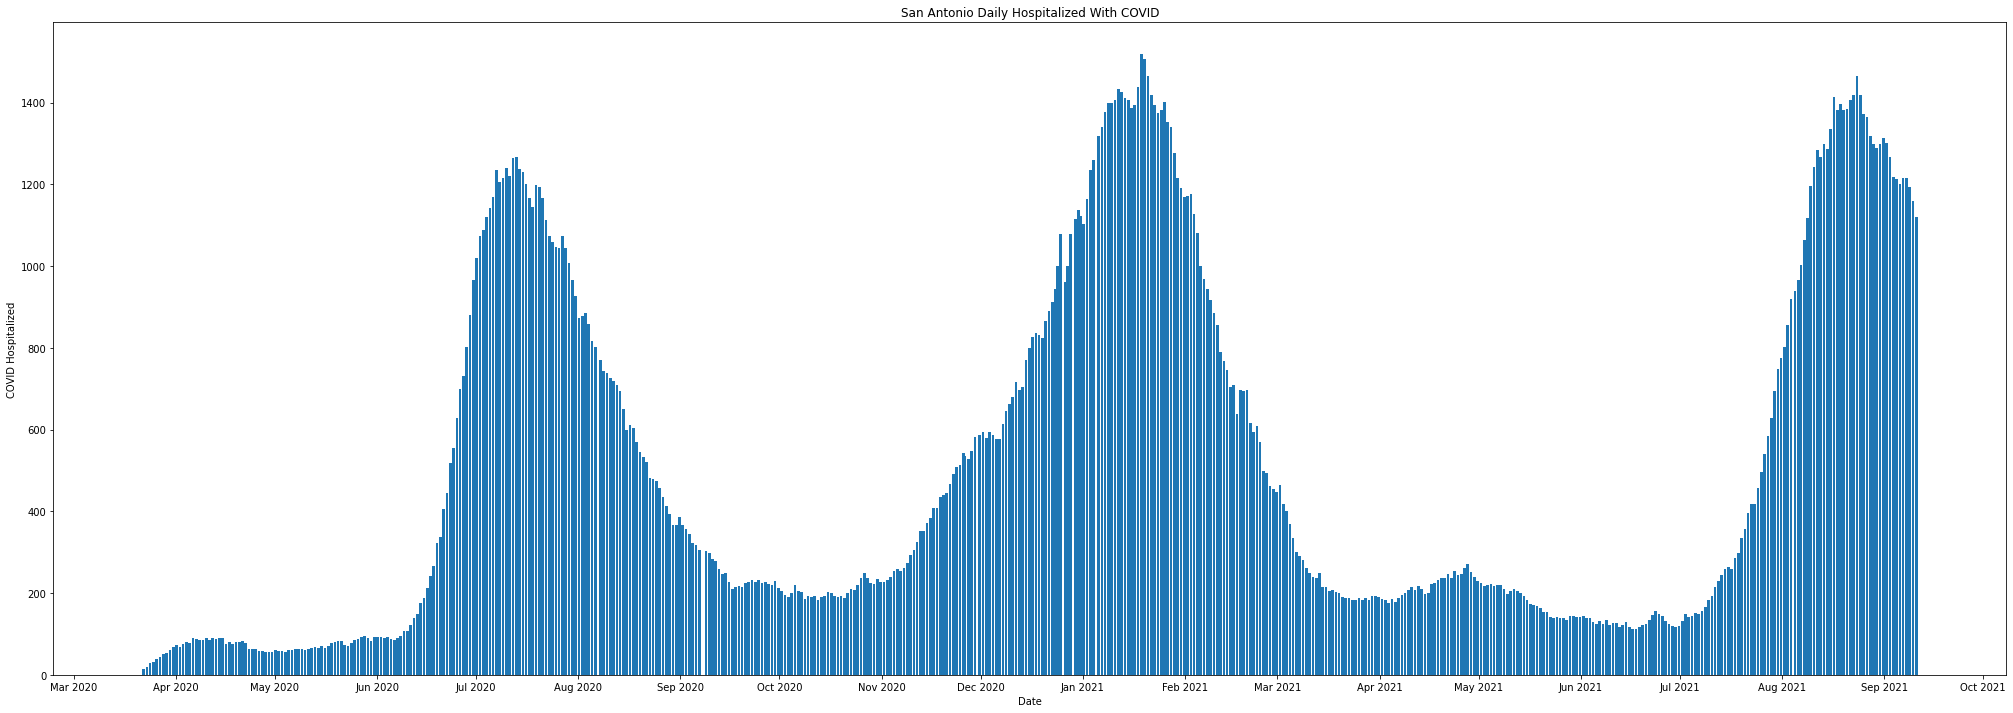

In [19]:
import datetime
import matplotlib.dates as mdates
months = mdates.MonthLocator()
days = mdates.DayLocator()
timeFmt = mdates.DateFormatter('%b %Y')
fig, ax = plt.subplots()
fig.set_size_inches(35,12)
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(timeFmt)
#ax.xaxis.set_minor_locator(months)
plt.title('San Antonio Daily Hospitalized With COVID')
plt.xlabel('Date',color='black')
plt.ylabel('COVID Hospitalized',color='black')
plt.bar(df_sa_hospital.index,df_sa_hospital.strac_covid_positive_in_hospita)
fig.savefig('MetroHospitalSANew.png')

In [20]:
df_sa_availbeds = df_sa_dtindex.loc[:,['strac_available_staffed_beds']]

In [21]:
df_sa_availbeds

,strac_available_staffed_beds
reporting_date,
2020-02-12 06:00:00+00:00,NaN
2020-02-13 06:00:00+00:00,NaN
2020-02-14 06:00:00+00:00,NaN
2020-02-15 06:00:00+00:00,NaN
2020-02-16 06:00:00+00:00,NaN
...,...
2021-09-06 17:00:00+00:00,489.0
2021-09-07 17:00:00+00:00,477.0
2021-09-08 17:00:00+00:00,405.0


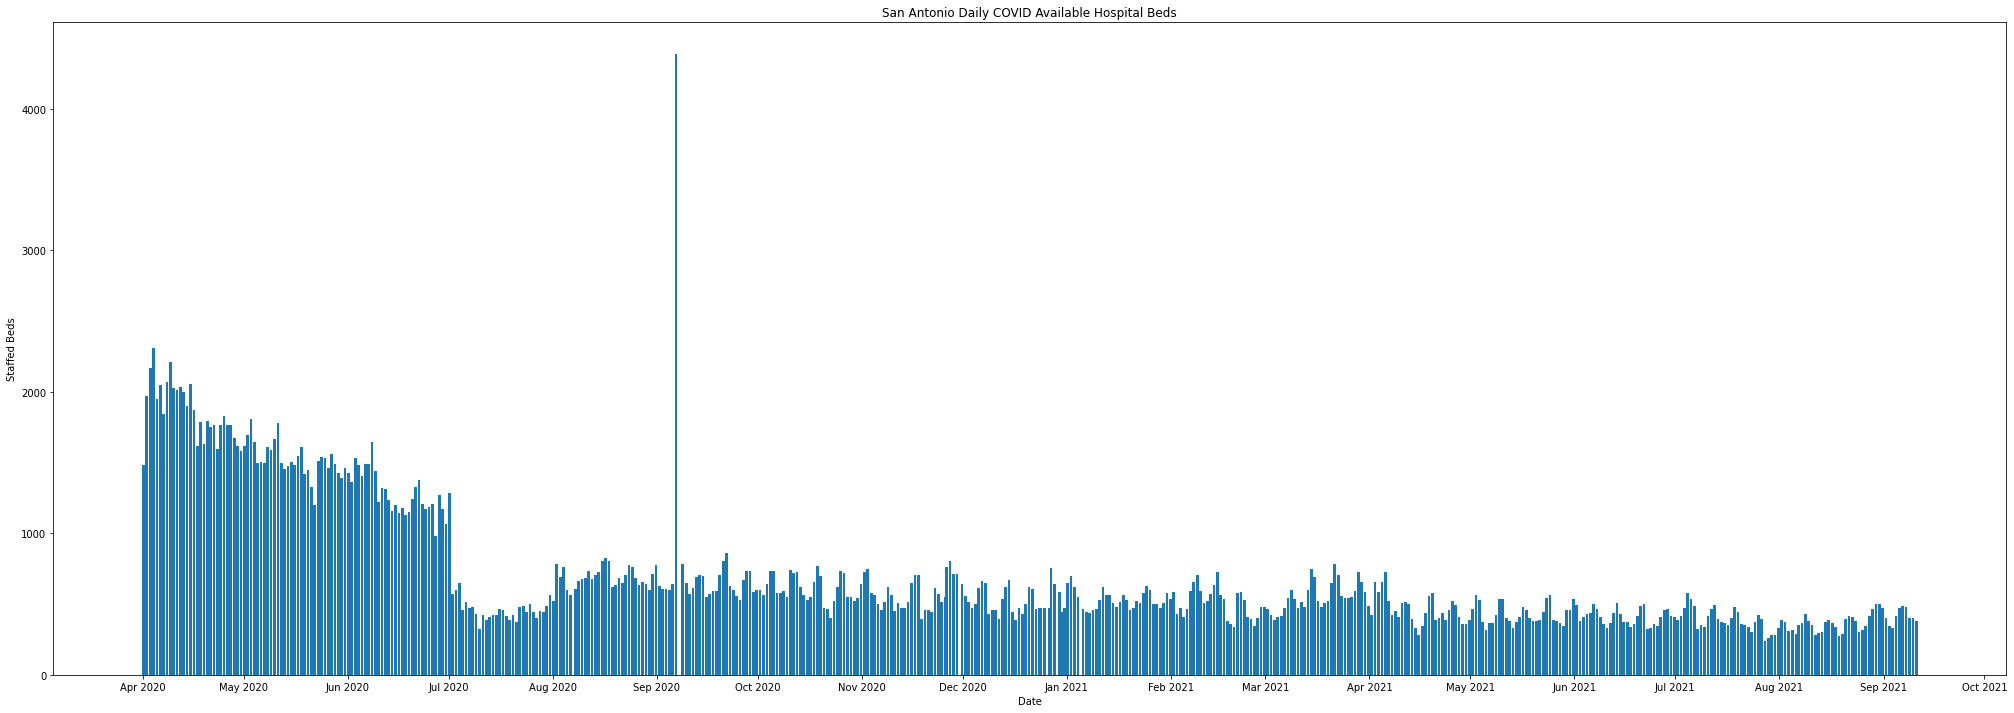

In [22]:
import datetime
import matplotlib.dates as mdates
months = mdates.MonthLocator()
days = mdates.DayLocator()
timeFmt = mdates.DateFormatter('%b %Y')
fig, ax = plt.subplots()
fig.set_size_inches(35,12)
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(timeFmt)
#ax.xaxis.set_minor_locator(months)
plt.title('San Antonio Daily COVID Available Hospital Beds')
plt.xlabel('Date',color='black')
plt.ylabel('Staffed Beds',color='black')
plt.bar(df_sa_availbeds.index,df_sa_availbeds.strac_available_staffed_beds)
fig.savefig('MetroAvailBedsSANew.png')